In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the FOMC statements page
url = 'https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find all links to FOMC statements
links = soup.find_all('a', href=True)

# Filter links that contain 'press' in the URL (assuming these are the statements)
statement_links = [link['href'] for link in links if 'press' in link['href']]

# Display the first few statement links
statement_links[:5]

['/newsevents/pressreleases.htm',
 '/newsevents/pressreleases/monetary20240131a.htm',
 '/newsevents/pressreleases/monetary20240131a1.htm',
 '/newsevents/pressreleases/monetary20240131b.htm',
 '/newsevents/pressreleases/monetary20240320a.htm']

In [2]:
# Base URL for the Federal Reserve website
base_url = 'https://www.federalreserve.gov'

# Function to fetch the content of a statement

def fetch_statement_content(relative_url):
    full_url = base_url + relative_url
    response = requests.get(full_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extract the main content of the statement
    content_div = soup.find('div', {'class': 'col-xs-12 col-sm-8 col-md-8'})
    if content_div:
        return content_div.get_text(strip=True)
    return ''

# Fetch content for the first few statements
statement_texts = [fetch_statement_content(link) for link in statement_links[:5]]

# Display the first few characters of each statement
[statement[:200] for statement in statement_texts]

['2024 FOMC20242023 FOMC20232022 FOMC20222021 FOMC20212020 FOMC202020192018201720162015201420132012201120102009200820072006Archive',
 'Recent indicators suggest that economic activity has been expanding at a solid pace. Job gains have moderated since early last year but remain strong, and the unemployment rate has remained low. Infla',
 '',
 'The Federal Open Market Committee, at its annual organization meeting this week, unanimously reaffirmed its "Statement on Longer-Run Goals and Monetary Policy Strategy," often known as the consensus s',
 'Recent indicators suggest that economic activity has been expanding at a solid pace. Job gains have remained strong, and the unemployment rate has remained low. Inflation has eased over the past year ']

In [3]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Preprocess the fetched statements
preprocessed_statements = [preprocess_text(statement) for statement in statement_texts]

# Display the first few preprocessed statements
preprocessed_statements[:3]

[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['fomc fomc fomc fomc fomcarchive',
 'recent indicators suggest economic activity expanding solid pace job gains moderated since early last year remain strong unemployment rate remained low inflation eased past year remains elevatedthe committee seeks achieve maximum employment inflation rate percent longer run committee judges risks achieving employment inflation goals moving better balance economic outlook uncertain committee remains highly attentive inflation risksin support goals committee decided maintain target range federal funds rate percent considering adjustments target range federal funds rate committee carefully assess incoming data evolving outlook balance risks committee expect appropriate reduce target range gained greater confidence inflation moving sustainably toward percent addition committee continue reducing holdings treasury securities agency debt agency mortgagebacked securities described previously announced plans committee strongly committed returning inflation 

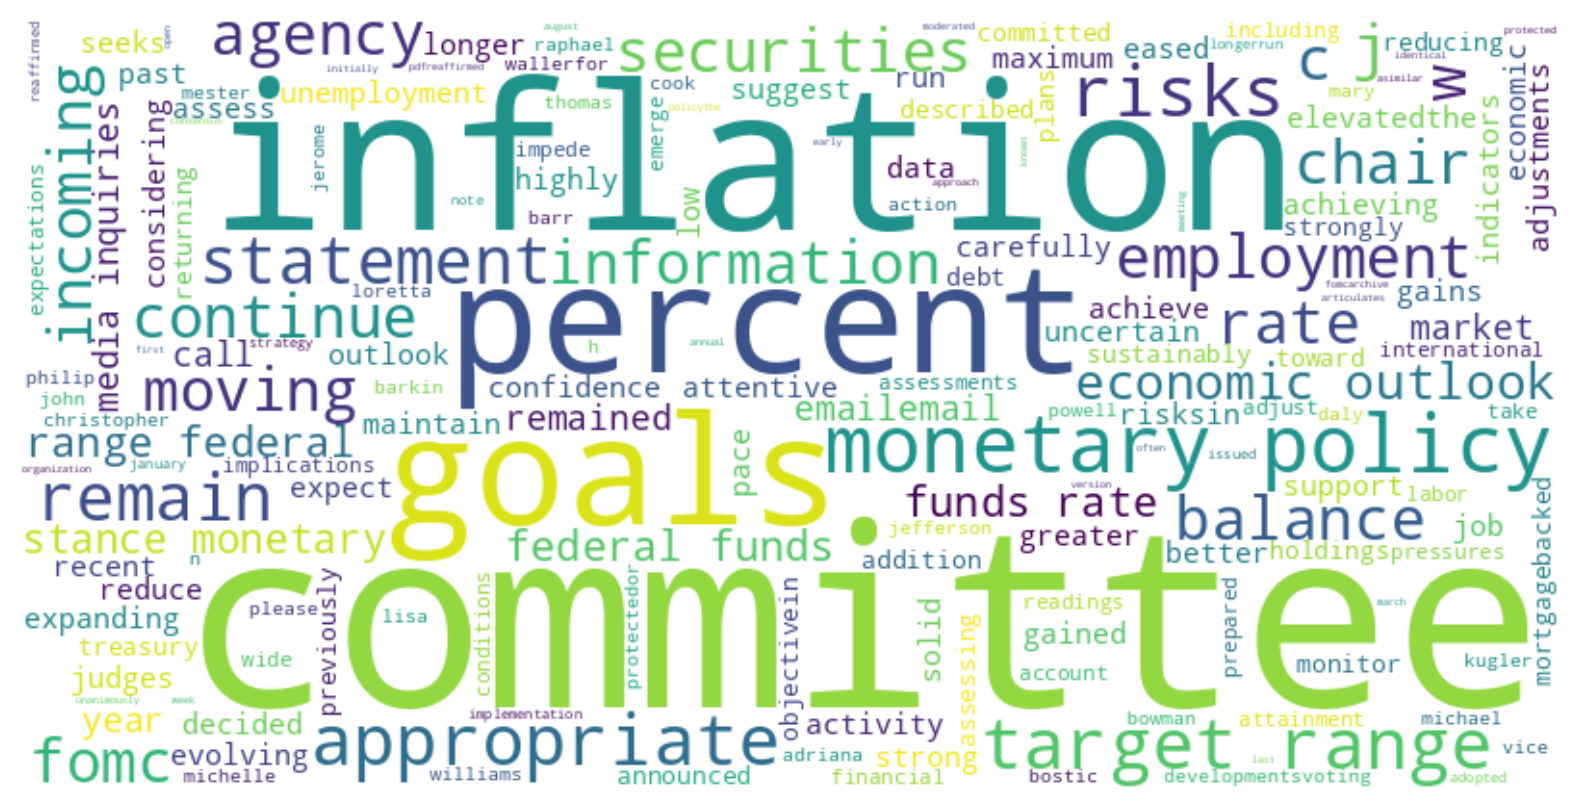

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all preprocessed statements into a single text
all_text = ' '.join(preprocessed_statements)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each preprocessed statement
sentiments = [sid.polarity_scores(statement) for statement in preprocessed_statements]

# Convert sentiments to a DataFrame
sentiment_df = pd.DataFrame(sentiments)

# Display the first few rows of the sentiment DataFrame
sentiment_df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/repl/nltk_data...


,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.076,0.759,0.165,0.9538
2,0.000,0.000,0.000,0.0000
3,0.000,0.943,0.057,0.4404
4,0.078,0.754,0.169,0.9538


In [6]:
from collections import Counter

# Tokenize the combined text
words = all_text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Convert the word counts to a DataFrame
word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

# Display the top 10 most frequent words
word_counts_df.head(10)

,word,count
28,committee,22
23,inflation,16
89,monetary,9
39,goals,8
20,rate,8
90,policy,8
52,range,8
33,percent,8
37,risks,6
63,appropriate,6
